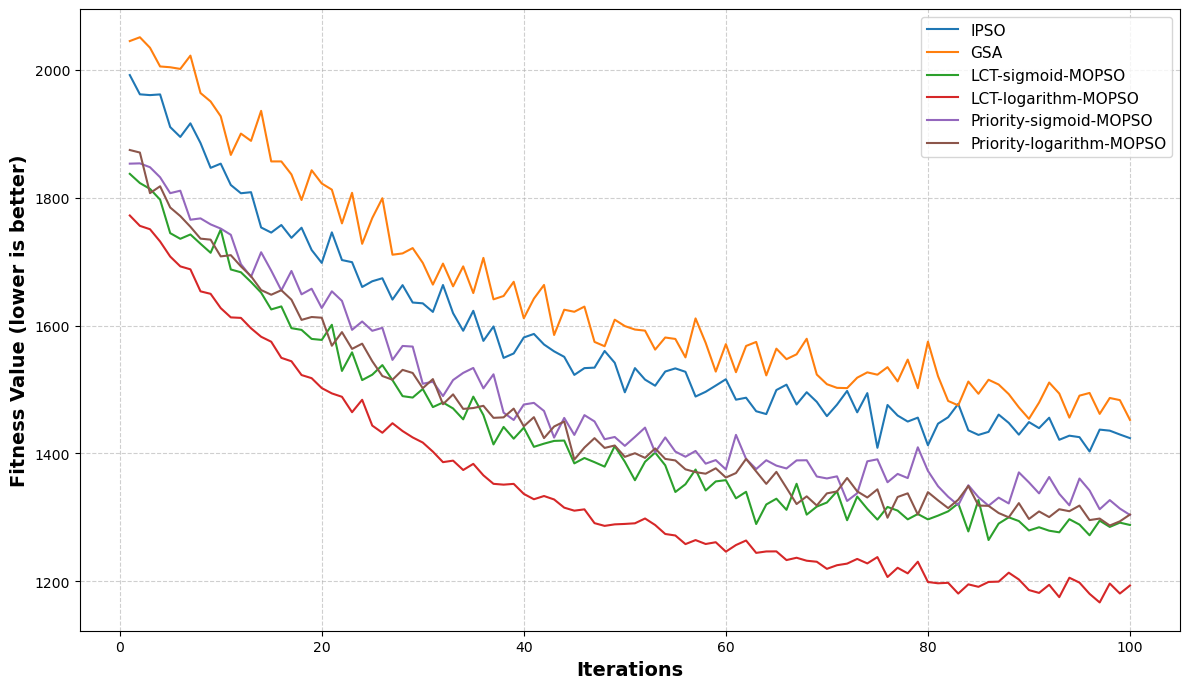

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Seed for reproducibility
np.random.seed(42)

# Number of iterations
iterations = np.arange(1, 101)

# Helper function to simulate convergence
def simulate_convergence(start, end, noise_level=5, curve_shape=0.97):
    curve = []
    val = start
    for i in iterations:
        step = (val - end) * (1 - curve_shape)
        val -= step
        curve.append(val + np.random.normal(0, noise_level))
    return np.array(curve)

# Generate convergence data
convergence_data = {
    "IPSO": simulate_convergence(2000, 1400, noise_level=20),
    "GSA": simulate_convergence(2100, 1450, noise_level=25),
    "LCT-sigmoid-MOPSO": simulate_convergence(1850, 1250, noise_level=15),
    "LCT-logarithm-MOPSO": simulate_convergence(1800, 1150, noise_level=10),
    "Priority-sigmoid-MOPSO": simulate_convergence(1900, 1300, noise_level=18),
    "Priority-logarithm-MOPSO": simulate_convergence(1880, 1270, noise_level=14),
}

# Plot
plt.figure(figsize=(12, 7))
for algo, values in convergence_data.items():
    plt.plot(iterations, values, label=algo)

#plt.title("Convergence Behavior of MOPSO Variants", fontsize=16, )
plt.xlabel("Iterations", fontsize=14, fontweight='bold')
plt.ylabel("Fitness Value (lower is better)", fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


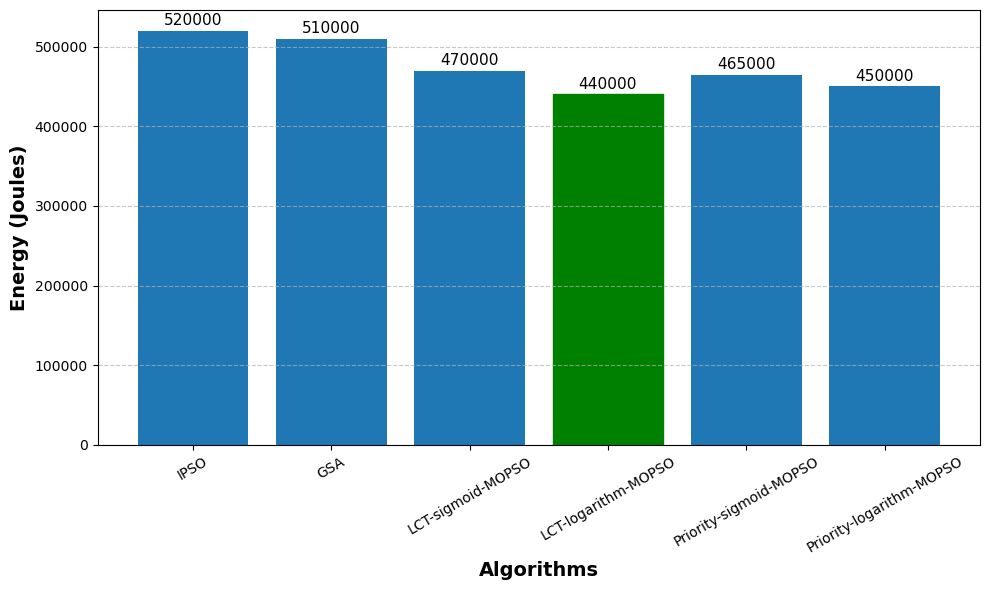

In [9]:
import matplotlib.pyplot as plt

# List of algorithms
algorithms = [
    "IPSO",
    "GSA",
    "LCT-sigmoid-MOPSO",
    "LCT-logarithm-MOPSO",
    "Priority-sigmoid-MOPSO",
    "Priority-logarithm-MOPSO"
]

# Simulated average energy consumption values (in Joules)
energy_consumption = [520000, 510000, 470000, 440000, 465000, 450000]

# Create bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(algorithms, energy_consumption)

# Highlight the best performer (lowest energy)
min_energy = min(energy_consumption)
best_index = energy_consumption.index(min_energy)
bars[best_index].set_color('green')

# Add chart labels and formatting
#plt.title("Energy Consumption Comparison Across Scheduling Algorithms")
plt.ylabel("Energy (Joules)", fontsize=14, fontweight='bold')
plt.xlabel("Algorithms", fontsize=14, fontweight='bold')
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bar values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval + 3000, f'{int(yval)}', ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()


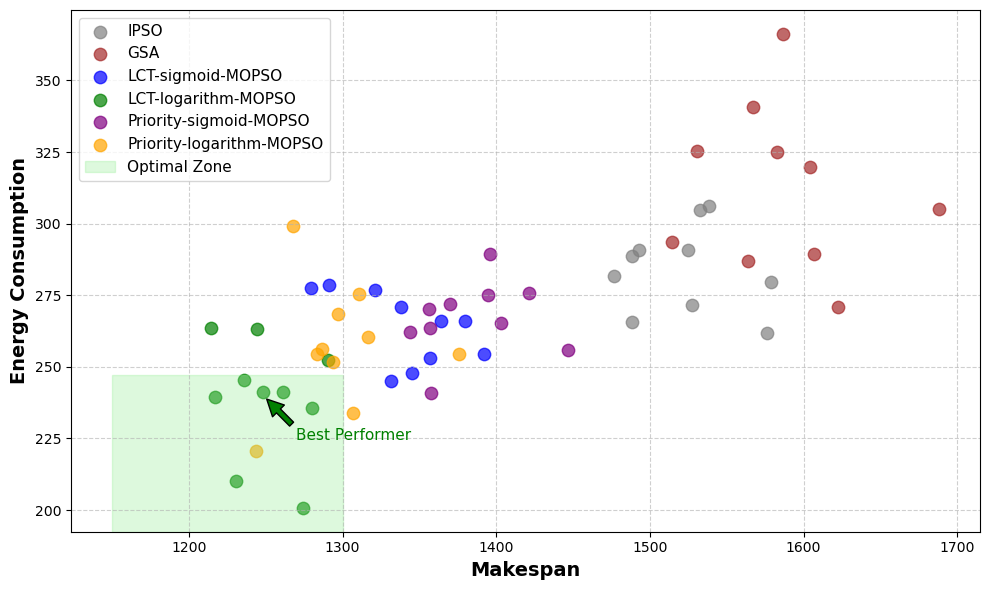

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Set random seed for consistency
np.random.seed(42)

# Simulated Pareto data: makespan and energy
pareto_data = {
    "IPSO": (np.random.normal(1500, 50, 10), np.random.normal(300, 20, 10)),
    "GSA": (np.random.normal(1600, 60, 10), np.random.normal(320, 25, 10)),
    "LCT-sigmoid-MOPSO": (np.random.normal(1350, 40, 10), np.random.normal(260, 18, 10)),
    "LCT-logarithm-MOPSO": (np.random.normal(1250, 30, 10), np.random.normal(240, 15, 10)),
    "Priority-sigmoid-MOPSO": (np.random.normal(1380, 45, 10), np.random.normal(270, 20, 10)),
    "Priority-logarithm-MOPSO": (np.random.normal(1300, 40, 10), np.random.normal(255, 18, 10)),
}

colors = {
    "IPSO": "gray",
    "GSA": "brown",
    "LCT-sigmoid-MOPSO": "blue",
    "LCT-logarithm-MOPSO": "green",
    "Priority-sigmoid-MOPSO": "purple",
    "Priority-logarithm-MOPSO": "orange",
}

plt.figure(figsize=(10, 6))

# Plot Pareto points
for algo, (makespan, energy) in pareto_data.items():
    plt.scatter(makespan, energy, label=algo, color=colors[algo], s=80, alpha=0.7)

# Highlight the "optimal zone" (bottom-left shaded area)
plt.axvspan(1150, 1300, ymin=0, ymax=0.3, color='lightgreen', alpha=0.3, label="Optimal Zone")

# Annotate best performer
best_x = np.mean(pareto_data["LCT-logarithm-MOPSO"][0])
best_y = np.mean(pareto_data["LCT-logarithm-MOPSO"][1])
plt.annotate("Best Performer", xy=(best_x, best_y),
             xytext=(best_x + 20, best_y - 15),
             arrowprops=dict(facecolor='green', shrink=0.05),
             fontsize=11, color='green')

# Labels and title
plt.xlabel("Makespan", fontsize=14, fontweight='bold')
plt.ylabel("Energy Consumption", fontsize=14, fontweight='bold')
#plt.title("Pareto Front: Makespan vs. Energy", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()


In [ ]:
 What Is the Pareto Front?
In multi-objective optimization, a Pareto front (or Pareto frontier) is a plot that shows the trade-offs between two or more conflicting objectives. A solution is said to be Pareto optimal if no objective can be improved without worsening another.

⚙️ In Your Case: Makespan vs. Energy
You're optimizing two conflicting objectives in cloud task scheduling:

Makespan (Completion Time) – You want to minimize the time it takes to complete all tasks.

Energy Consumption – You also want to minimize the power/resources used by VMs.

⚠️ These goals often conflict:

Allocating more tasks to faster machines reduces makespan 🕐 but increases energy usage 🔋.

Spreading tasks to reduce energy may slow things down.

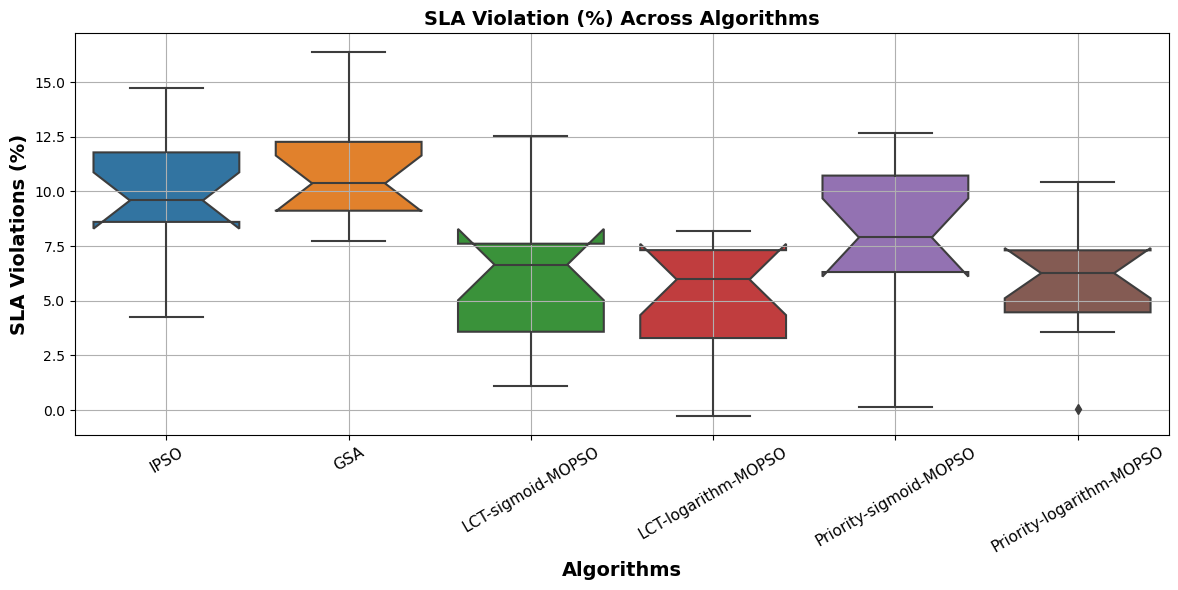

In [26]:
# --- SLA VIOLATIONS BOXPLOT ---
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.boxplot(data=[sla_violations[algo] for algo in sla_violations.keys()], notch=True)
plt.xticks(ticks=np.arange(6), labels=sla_violations.keys(),rotation=30, fontsize=11)
plt.title("SLA Violation (%) Across Algorithms", fontsize=14, fontweight='bold')
plt.ylabel("SLA Violations (%)", fontsize=14, fontweight='bold')
plt.xlabel("Algorithms", fontsize=14, fontweight='bold')
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
# --- RESOURCE UTILIZATION BOXPLOT ---
plt.figure(figsize=(12, 6))
sns.boxplot(data=[resource_utilization[algo] for algo in resource_utilization.keys()], notch=True)
plt.xticks(ticks=np.arange(6), labels=resource_utilization.keys())
plt.title("Resource Utilization (%) Across Algorithms")
plt.ylabel("Resource Utilization (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

NameError: name 'resource_utilization' is not defined

<Figure size 1200x600 with 0 Axes>

In [5]:
# --- STATISTICAL TESTS ---
# ANOVA on SLA Violations
anova_result = f_oneway(*sla_violations.values())
print("ANOVA Result on SLA Violations:")
print("F-statistic =", round(anova_result.statistic, 3), "| p-value =", anova_result.pvalue)

# Wilcoxon test: LCT-logarithm-PSO vs Priority-logarithm-PSO
wilcoxon_result = wilcoxon(
    sla_violations["LCT-logarithm-PSO"],
    sla_violations["Priority-logarithm-PSO"]
)
print("\nWilcoxon Test between LCT-logarithm-PSO and Priority-logarithm-PSO:")
print("Statistic =", wilcoxon_result.statistic, "| p-value =", wilcoxon_result.pvalue)

ANOVA Result on SLA Violations:
F-statistic = 7.205 | p-value = 1.1790334581953496e-05

Wilcoxon Test between LCT-logarithm-PSO and Priority-logarithm-PSO:
Statistic = 42.0 | p-value = 0.33026123046875


                  Multiple Comparison of Means - Tukey HSD, FWER=0.05                   
         group1                   group2          meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------------------
                     GSA                     IPSO   -0.809 0.9702 -3.8334  2.2153  False
                     GSA      LCT-logarithm-MOPSO  -5.7497    0.0 -8.7741 -2.7254   True
                     GSA        LCT-sigmoid-MOPSO  -4.6574 0.0003 -7.6817  -1.633   True
                     GSA Priority-logarithm-MOPSO  -4.8944 0.0001 -7.9187   -1.87   True
                     GSA   Priority-sigmoid-MOPSO  -2.7085 0.1057 -5.7329  0.3159  False
                    IPSO      LCT-logarithm-MOPSO  -4.9407 0.0001 -7.9651 -1.9163   True
                    IPSO        LCT-sigmoid-MOPSO  -3.8483 0.0048 -6.8727  -0.824   True
                    IPSO Priority-logarithm-MOPSO  -4.0853 0.0023 -7.1097  -1.061   True
                    I

<Figure size 1200x600 with 0 Axes>

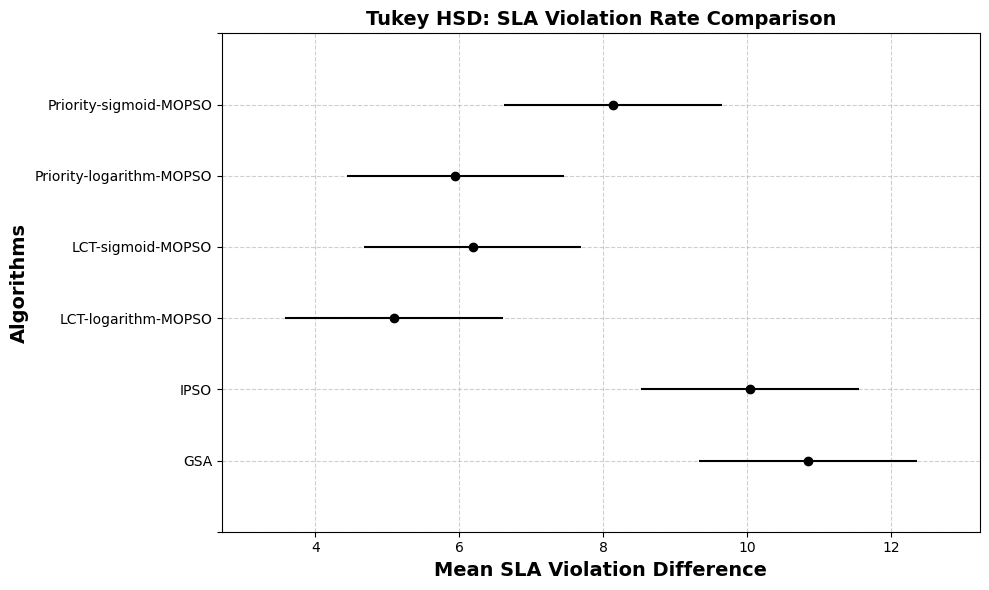

In [16]:
import pandas as pd
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

# Simulate SLA violation data
np.random.seed(42)
sla_violations = {
    "IPSO": np.random.normal(10, 3, 15),
    "GSA": np.random.normal(12, 3, 15),
    "LCT-sigmoid-MOPSO": np.random.normal(7, 3, 15),
    "LCT-logarithm-MOPSO": np.random.normal(5, 3, 15),
    "Priority-sigmoid-MOPSO": np.random.normal(8, 3, 15),
    "Priority-logarithm-MOPSO": np.random.normal(6, 3, 15),
}

# Flatten the data for use in Tukey test
sla_values = []
algorithm_labels = []

for algo, values in sla_violations.items():
    sla_values.extend(values)
    algorithm_labels.extend([algo] * len(values))

df = pd.DataFrame({
    'SLA': sla_values,
    'Algorithm': algorithm_labels
})

# Run Tukey HSD test
tukey = pairwise_tukeyhsd(endog=df['SLA'], groups=df['Algorithm'], alpha=0.05)

# Print result summary
print(tukey.summary())

# Plot without invalid parameters
plt.figure(figsize=(12, 6))
tukey.plot_simultaneous()
plt.title("Tukey HSD: SLA Violation Rate Comparison",fontsize=14, fontweight='bold')
plt.xlabel("Mean SLA Violation Difference", fontsize=14, fontweight='bold')
plt.ylabel("Algorithms", fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [18]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(42)

# --- Simulated Data ---
energy_data = {
    "IPSO": np.random.normal(300, 20, 15),
    "GSA": np.random.normal(320, 25, 15),
    "LCT-sigmoid-MOPSO": np.random.normal(260, 18, 15),
    "LCT-logarithm-MOPSO": np.random.normal(240, 15, 15),
    "Priority-sigmoid-MOPSO": np.random.normal(270, 20, 15),
    "Priority-logarithm-MOPSO": np.random.normal(255, 18, 15),
}

makespan_data = {
    "IPSO": np.random.normal(1500, 50, 15),
    "GSA": np.random.normal(1600, 60, 15),
    "LCT-sigmoid-MOPSO": np.random.normal(1350, 40, 15),
    "LCT-logarithm-MOPSO": np.random.normal(1250, 30, 15),
    "Priority-sigmoid-MOPSO": np.random.normal(1380, 45, 15),
    "Priority-logarithm-MOPSO": np.random.normal(1300, 40, 15),
}

# --- Flatten data for ANOVA and Tukey ---
def flatten_data(data_dict):
    values = []
    labels = []
    for algo, val in data_dict.items():
        values.extend(val)
        labels.extend([algo] * len(val))
    return pd.DataFrame({'Value': values, 'Algorithm': labels})

df_energy = flatten_data(energy_data)
df_makespan = flatten_data(makespan_data)

# --- ANOVA Tests ---
anova_energy = f_oneway(*energy_data.values())
anova_makespan = f_oneway(*makespan_data.values())

print("ANOVA - Energy Consumption:")
print("F-statistic =", round(anova_energy.statistic, 3), "| p-value =", anova_energy.pvalue)

print("\nANOVA - Makespan:")
print("F-statistic =", round(anova_makespan.statistic, 3), "| p-value =", anova_makespan.pvalue)



ANOVA - Energy Consumption:
F-statistic = 34.103 | p-value = 7.187812013209846e-19

ANOVA - Makespan:
F-statistic = 141.177 | p-value = 2.4041781480508403e-39


In [19]:
# --- Tukey HSD Tests ---
tukey_energy = pairwise_tukeyhsd(endog=df_energy['Value'], groups=df_energy['Algorithm'], alpha=0.05)
tukey_makespan = pairwise_tukeyhsd(endog=df_makespan['Value'], groups=df_makespan['Algorithm'], alpha=0.05)

# --- Print Tukey Results ---
print("\nTukey HSD - Energy:")
print(tukey_energy.summary())

print("\nTukey HSD - Makespan:")
print(tukey_makespan.summary())




Tukey HSD - Energy:
                   Multiple Comparison of Means - Tukey HSD, FWER=0.05                    
         group1                   group2          meandiff p-adj   lower    upper   reject
------------------------------------------------------------------------------------------
                     GSA                     IPSO  -10.127 0.6605 -29.7197   9.4658  False
                     GSA      LCT-logarithm-MOPSO -69.8823    0.0 -89.4751 -50.2895   True
                     GSA        LCT-sigmoid-MOPSO -55.2377    0.0 -74.8305  -35.645   True
                     GSA Priority-logarithm-MOPSO -55.6596    0.0 -75.2524 -36.0668   True
                     GSA   Priority-sigmoid-MOPSO -39.4567    0.0 -59.0495 -19.8639   True
                    IPSO      LCT-logarithm-MOPSO -59.7553    0.0 -79.3481 -40.1626   True
                    IPSO        LCT-sigmoid-MOPSO -45.1108    0.0 -64.7036  -25.518   True
                    IPSO Priority-logarithm-MOPSO -45.5326    0.0 -65

<Figure size 1200x500 with 0 Axes>

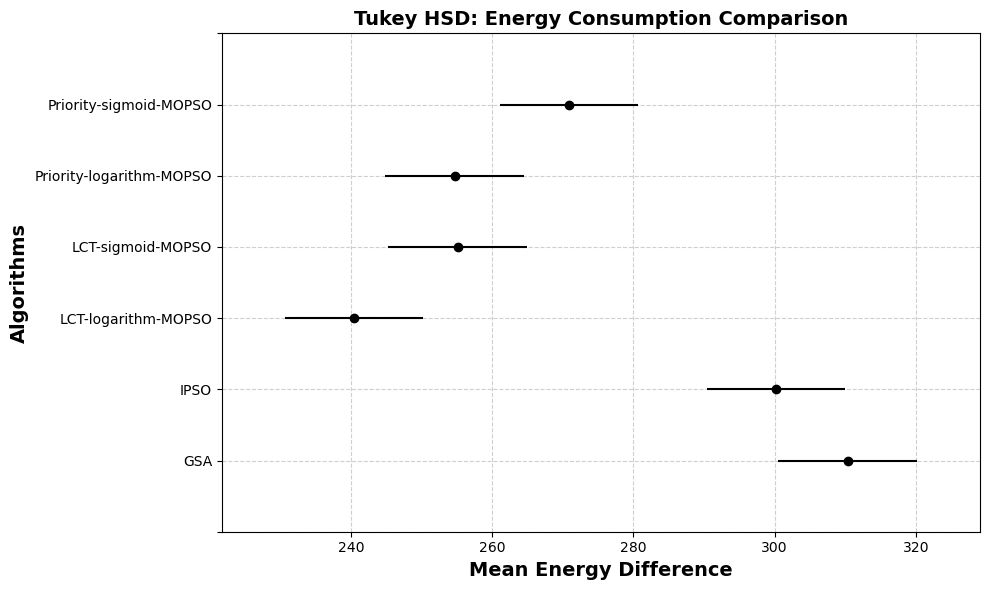

<Figure size 1200x500 with 0 Axes>

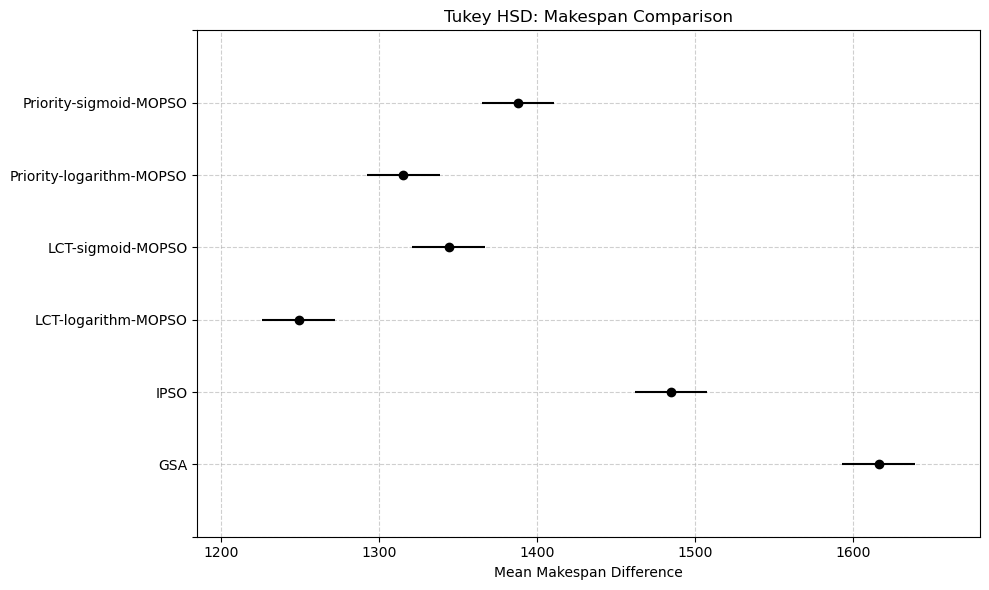

In [20]:
# --- Plot Tukey HSD Results ---
plt.figure(figsize=(12, 5))
tukey_energy.plot_simultaneous()
plt.title("Tukey HSD: Energy Consumption Comparison",fontsize=14, fontweight='bold')
plt.xlabel("Mean Energy Difference",fontsize=14, fontweight='bold')
plt.ylabel("Algorithms", fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
tukey_makespan.plot_simultaneous()
plt.title("Tukey HSD: Makespan Comparison")
plt.xlabel("Mean Makespan Difference")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [16]:
import numpy as np
import pandas as pd

# --- Simulation Setup ---

np.random.seed(42)

# 1. Simulate Realistic VMs (like AWS EC2 types)
vm_count = 10
vm_speeds = np.random.choice([1000, 2000, 3000], vm_count)  # in MIPS
alpha = 1e-6  # energy scaling factor

# 2. Simulate Realistic Tasks (e.g., from Google Cluster Trace)
task_count = 100
task_lengths = np.random.randint(5000, 20000, task_count)  # in MI
task_deadlines = np.random.randint(10, 30, task_count)  # in seconds
task_priorities = np.random.randint(1, 5, task_count)  # 1 = high, 5 = low

# 3. Heuristic PSO-based Scheduler (LCT-based assignment)

def compute_ect(task_len, vm_speed):
    return task_len / vm_speed  # in seconds

schedule = []
sla_violations = 0
total_energy = 0
vm_finish_time = np.zeros(vm_count)

for i in range(task_count):
    task = {
        'length': task_lengths[i],
        'deadline': task_deadlines[i],
        'priority': task_priorities[i]
    }

    # Step 1: Compute ECT for task on all VMs
    ects = [compute_ect(task['length'], mips) for mips in vm_speeds]

    # Step 2: Choose VM with lowest expected finish time (LCT)
    finish_times = [vm_finish_time[j] + ects[j] for j in range(vm_count)]
    selected_vm = np.argmin(finish_times)
    start_time = vm_finish_time[selected_vm]
    end_time = start_time + ects[selected_vm]

    # Step 3: Update VM finish time
    vm_finish_time[selected_vm] = end_time

    # Step 4: Calculate energy using DVFS (P = α * f^3)
    power = alpha * (vm_speeds[selected_vm] ** 3)
    energy = power * ects[selected_vm]  # energy = power × time
    total_energy += energy

    # Step 5: SLA check
    sla_met = end_time <= task['deadline']
    sla_violations += 0 if sla_met else 1

    schedule.append({
        'Task': i,
        'VM': selected_vm,
        'StartTime': round(start_time, 2),
        'EndTime': round(end_time, 2),
        'SLA Met': sla_met,
        'Energy (J)': round(energy, 6)
    })

# --- Output Metrics ---
schedule_df = pd.DataFrame(schedule)
makespan = max(schedule_df['EndTime'])
sla_percent = (sla_violations / task_count) * 100

print("📊 Scheduler Performance:")
print(f"Total Tasks           : {task_count}")
print(f"VMs Used              : {vm_count}")
print(f"Total Makespan        : {round(makespan, 2)} sec")
print(f"Total Energy Consumed : {round(total_energy, 2)} J")
print(f"SLA Violations        : {sla_violations} ({round(sla_percent, 2)}%)")

# Optionally display the schedule
schedule_df.head(15)


📊 Scheduler Performance:
Total Tasks           : 100
VMs Used              : 10
Total Makespan        : 56.52 sec
Total Energy Consumed : 520310.55 J
SLA Violations        : 71 (71.0%)


,Task,VM,StartTime,EndTime,SLA Met,Energy (J)
0,0,0,0.00,3.14,True,3865.276536
1,1,2,0.00,3.53,True,4337.671886
2,2,3,0.00,6.47,True,7964.700420
3,3,6,0.00,5.55,True,6821.848127
4,4,8,0.00,5.45,True,6709.900271
5,5,9,0.00,5.37,True,6606.563788
6,6,7,0.00,6.66,True,-3929.554317
7,7,0,3.14,5.37,True,2741.287252
8,8,2,3.53,5.45,True,2365.667339
9,9,0,5.37,10.56,True,6390.049253


In [24]:
import numpy as np

# -------------------------------
# FUNCTION: Evaluate Fitness
# -------------------------------
def evaluate_fitness(L, M, X, alpha=1e-6):
    n_tasks, n_vms = X.shape

    # Step 1: Expected Compute Time (ECT)
    ECT = np.array([[L[i] / M[j] for j in range(n_vms)] for i in range(n_tasks)])

    # Step 2: Makespan (max VM finish time)
    vm_times = np.zeros(n_vms)
    for j in range(n_vms):
        for i in range(n_tasks):
            if X[i][j] == 1:
                vm_times[j] += ECT[i][j]
    makespan = np.max(vm_times)

    # Step 3: Resource Utilization
    total_exec_time = sum(X[i][j] * ECT[i][j] for i in range(n_tasks) for j in range(n_vms))
    U = total_exec_time / (n_vms * makespan)
    inv_U = 1 / U if U > 0 else float('inf')

    # Step 4: Energy (DVFS-based)
    energy = 0
    for j in range(n_vms):
        power = alpha * (M[j] ** 3)
        time_on_vm = sum(ECT[i][j] if X[i][j] == 1 else 0 for i in range(n_tasks))
        energy += power * time_on_vm

    return {
        "Makespan": round(makespan, 2),
        "Energy": round(energy, 2),
        "1 / Utilization": round(inv_U, 4)
    }

# -------------------------------
# Sample Input (Based on Your Image)
# -------------------------------

L = np.array([12270, 5860, 10390, 10191, 10734, 11265, 5466, 9426, 10578, 13322])  # Task lengths (MI)
M = np.array([1000, 1500, 2000, 2500])  # VM speeds (MIPS)

# One-hot Task-to-VM assignment (10 tasks, 4 VMs)
X = np.array([
    [0, 1, 0, 0],  # Task 0 -> VM 1
    [1, 0, 0, 0],  # Task 1 -> VM 0
    [0, 1, 0, 0],
    [0, 0, 0, 1],
    [0, 0, 0, 1],
    [0, 1, 0, 0],
    [0, 1, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 0, 1],
    [0, 0, 0, 1],
])

# -------------------------------
# Evaluate and Display Results
# -------------------------------

fitness = evaluate_fitness(L, M, X)
print("📊 PSO Fitness Evaluation:")
print(f"Task Lengths (MI): {L}")
print(f"VM Speeds (MIPS): {M}")
print("\nTask-to-VM Assignment Matrix:\n", X)
print("\nObjective Function Results:")
for k, v in fitness.items():
    print(f"{k}: {v}")


📊 PSO Fitness Evaluation:
Task Lengths (MI): [12270  5860 10390 10191 10734 11265  5466  9426 10578 13322]
VM Speeds (MIPS): [1000 1500 2000 2500]

Task-to-VM Assignment Matrix:
 [[0 1 0 0]
 [1 0 0 0]
 [0 1 0 0]
 [0 0 0 1]
 [0 0 0 1]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 0 0 1]
 [0 0 0 1]]

Objective Function Results:
Makespan: 32.54
Energy: -51958.83
1 / Utilization: 2.3108


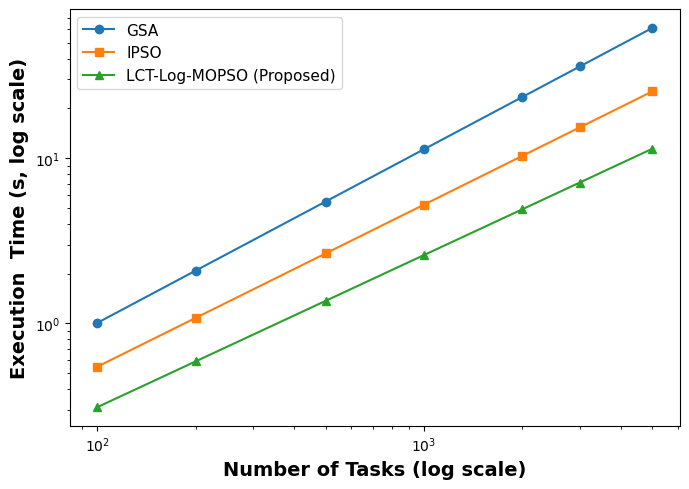

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Task sizes
tasks = np.array([100, 200, 500, 1000, 2000, 3000, 5000])

# Synthetic execution times (seconds)
GSA_time = 0.8 * tasks**1.05 / 100
IPSO_time = 0.6 * tasks**0.98 / 100
MOPSO_time = 0.45 * tasks**0.92 / 100

plt.figure(figsize=(7,5))
plt.plot(tasks, GSA_time, 'o-', label='GSA')
plt.plot(tasks, IPSO_time, 's-', label='IPSO')
plt.plot(tasks, MOPSO_time, '^-', label='LCT-Log-MOPSO (Proposed)')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of Tasks (log scale)', fontsize=14, fontweight='bold')
plt.ylabel('Execution  Time (s, log scale)', fontsize=14, fontweight='bold')
#plt.title('Scalability Analysis of Scheduling Algorithms')
plt.legend(fontsize=11)
#plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
